# Equilibrium Temperature Distributions

### Authors

Ansh Gandhi, Krrish Kainth, FNU Kalkin

### Division of Labor

|Name|Task|
|----|----|
|Ansh|Question 4|
|Krrish|Questions 2 and 3|
|Kalkin|Questions 1 and 5|

### Math Work

At thermal equilibrium, the temperature of a plate at a particular point is the average of the temperatures at surrounding points, by the Mean Value Property. Calculating the heat distribution of the plate is simpler when considering a finite grid of points, where the temperature at a point is the mean of the temperatures at the four points around it. Given the size of the grid and the external temperatures surrounding the plate, a system of linear equations, with an average temperature equation per grid point, can be created and solved for the temperature at each point at equilibrium.

In [3]:
import numpy as np
import scipy.linalg as spla
from sympy import Matrix
from seaborn import heatmap

In [4]:
def solveTempEq(size, lTemp, uTemp, rTemp, dTemp):
    C = np.zeros((size*size, size*size))
    b = np.zeros(size*size)
    for r in range(size):
        for c in range(size):
            ptNum = findPtNum(r, c, size)
            if c - 1 != -1:
                C[ptNum][ptNum - 1] = 1
            else:
                b[ptNum] += lTemp
            if r - 1 != -1:
                C[ptNum][ptNum - size] = 1
            else:
                b[ptNum] += uTemp
            if c + 1 != size:
                C[ptNum][ptNum + 1] = 1
            else:
                b[ptNum] += rTemp
            if r + 1 != size:
                C[ptNum][ptNum + size] = 1
            else:
                b[ptNum] += dTemp
    return np.linalg.solve(4 * np.identity(size * size) - C, b)

def findPtNum(row, col, size):
    return size * row + col

def plotTemp(size, x):
    heatmap(x.reshape(size, size), xticklabels=False, yticklabels=False, annot=True, fmt=".2f", cbar=False, center=0)


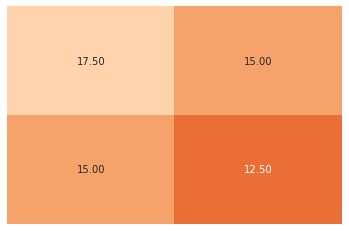

In [5]:
x = solveTempEq(2, 10, 30, 0, 20)
plotTemp(2, x)

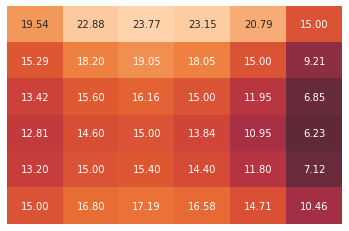

In [6]:
x = solveTempEq(6, 10, 30, 0, 20)
plotTemp(6, x)

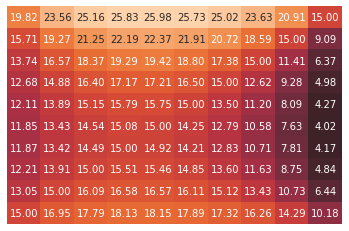

In [7]:
x = solveTempEq(10, 10, 30, 0, 20)
plotTemp(10, x)

## Question 1

##### Solve the following system by row reduction:

$$\textbf{x} = \begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{pmatrix}, C = \begin{pmatrix}
0 & 1 & 1 & 0 \\
1 & 0 & 0 & 1 \\
1 & 0 & 0 & 1 \\
0 & 1 & 1 & 0
\end{pmatrix}, \textbf{b} = \begin{pmatrix}
40 \\
30 \\
30 \\
20
\end{pmatrix}$$

$$4\textbf{x} = C\textbf{x} + \textbf{b}$$

$$(4I-C)\textbf{x} = \textbf{b}$$

$$A = 4I - C$$

In [8]:
C = Matrix([[0, 1, 1, 0],
            [1, 0, 0, 1],
            [1, 0, 0, 1],
            [0, 1, 1, 0]])
print("C = ")
C

C = 


Matrix([
[0, 1, 1, 0],
[1, 0, 0, 1],
[1, 0, 0, 1],
[0, 1, 1, 0]])

In [9]:
I = Matrix([[1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]])
A = 4 * I - C
print("A = ")
A

A = 


Matrix([
[ 4, -1, -1,  0],
[-1,  4,  0, -1],
[-1,  0,  4, -1],
[ 0, -1, -1,  4]])

In [10]:
M = A.col_insert(A.shape[0], Matrix([40, 30, 30, 20]))
print("Augmented Matrix:")
M

Augmented Matrix:


Matrix([
[ 4, -1, -1,  0, 40],
[-1,  4,  0, -1, 30],
[-1,  0,  4, -1, 30],
[ 0, -1, -1,  4, 20]])

In [11]:
print("Row Reduced Echelon Form:")
M.rref()[0]

Row Reduced Echelon Form:


Matrix([
[1, 0, 0, 0, 35/2],
[0, 1, 0, 0,   15],
[0, 0, 1, 0,   15],
[0, 0, 0, 1, 25/2]])

In [15]:
x = M.rref()[0].col(M.shape[0])
print('x = ')
x

x = 


Matrix([
[35/2],
[  15],
[  15],
[25/2]])

## Question 2

##### Find $A$, $A^{-1}$, and $\textbf{x}$ for the above system of equations. Confirm that your answer matches that of Question 1.

In [18]:
C = np.matrix([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]])
b = np.array([[40], [30], [30], [20]])
A = 4 * np.identity(4) - C
print("A =")
Matrix(A)

A =


Matrix([
[ 4.0, -1.0, -1.0,  0.0],
[-1.0,  4.0,  0.0, -1.0],
[-1.0,  0.0,  4.0, -1.0],
[ 0.0, -1.0, -1.0,  4.0]])

In [19]:
A_inv = np.linalg.inv(A)
print("Inverse of A =")
Matrix(A_inv)

Inverse of A =


Matrix([
[ 0.291666666666667, 0.0833333333333333, 0.0833333333333333, 0.0416666666666667],
[0.0833333333333333,  0.291666666666667, 0.0416666666666667, 0.0833333333333333],
[0.0833333333333333, 0.0416666666666667,  0.291666666666667, 0.0833333333333333],
[0.0416666666666667, 0.0833333333333333, 0.0833333333333333,  0.291666666666667]])

In [20]:
x = A_inv * b
print("x =")
Matrix(x)

x =


Matrix([
[17.5],
[15.0],
[15.0],
[12.5]])

## Question 3
##### Suppose that the external temperature at the top of the plate changes to $50^{\circ}$. Use results from Question 2 to find the new equilibrium temperature distribution. 

In [21]:
b = np.array([[10 + 50], [50 + 0], [10 + 20], [20 + 0]])
x = A_inv * b
print("x =")
Matrix(x)

x =


Matrix([
[25.0],
[22.5],
[17.5],
[15.0]])

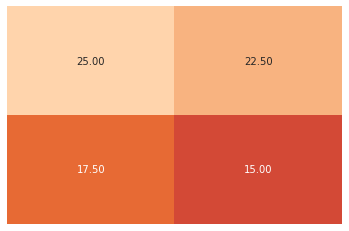

In [22]:
plotTemp(2, x)

## Question 4
##### Do an LU decomposition of $A$ above. Use it to solve the original system and the system with altered external temperatures. Confirm your earlier results. 

The code below shows the matrix L in the LU factorization.

In [69]:
L, U = spla.lu(A, permute_l=True)
print("L =")
Matrix(L)

L =


Matrix([
[  1.0,                 0.0,                0.0, 0.0],
[-0.25,                 1.0,                0.0, 0.0],
[-0.25, -0.0666666666666667,                1.0, 0.0],
[  0.0,  -0.266666666666667, -0.285714285714286, 1.0]])

The code below shows the matrix U in the LU factorization.

In [70]:
print("U =")
Matrix(U)

U =


Matrix([
[4.0, -1.0,             -1.0,               0.0],
[0.0, 3.75,            -0.25,              -1.0],
[0.0,  0.0, 3.73333333333333, -1.06666666666667],
[0.0,  0.0,              0.0,  3.42857142857143]])

The code below solves the original system using LU factorization.

In [71]:
b1 = np.array([[40], [30], [30], [20]])
y1 = np.linalg.solve(L, b1)
x1 = np.linalg.solve(U, y1)
print("x =")
Matrix(x1)

x =


Matrix([
[17.5],
[15.0],
[15.0],
[12.5]])

The code below solves the altered system using LU factorization.

In [72]:
b2 = np.array([[60], [50], [30], [20]])
y2 = np.linalg.solve(L, b2)
x2 = np.linalg.solve(U, y2)
print("x =")
Matrix(x2)

x =


Matrix([
[25.0],
[22.5],
[17.5],
[15.0]])

## Question 5
##### A finer grid should give a better approximation of the equilibrium temperatures. Consider the grid in Figure 3 on the following page. Now there are 25 grid points inside the plate, so we now have a system of 25 equations in 25 unknowns. The matrix $C$ and the vector $\textbf{b}$ below apply to this situation.

##### Find the temperature distribution in this case with the original external temperatures by either finding $(4I-C)^{-1}$ or by using the LU factorization.

In [73]:
C = np.array([
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])
Matrix(C)

Matrix([
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 

In [74]:
b = np.array([40, 30, 30, 30, 30, 10, 0, 0, 0, 0, 10, 0, 0, 0, 0, 10, 0, 0, 0, 0, 30, 20, 20, 20, 20])
Matrix(b)

Matrix([
[40],
[30],
[30],
[30],
[30],
[10],
[ 0],
[ 0],
[ 0],
[ 0],
[10],
[ 0],
[ 0],
[ 0],
[ 0],
[10],
[ 0],
[ 0],
[ 0],
[ 0],
[30],
[20],
[20],
[20],
[20]])

In [75]:
I_twenty_five = np.identity(25)
A = 4 * I_twenty_five - C
print('x = ')
x = np.linalg.solve(A, b)
Matrix(x)

x = 


Matrix([
[19.3737373737374],
[22.4013209013209],
[22.6557886557887],
[20.6639471639472],
[            15.0],
[15.0936285936286],
[17.5757575757576],
[17.5578865578866],
[            15.0],
[9.33605283605284],
[13.4250194250194],
[15.2501942501942],
[            15.0],
[12.4421134421134],
[7.34421134421135],
[13.3562548562549],
[            15.0],
[14.7498057498058],
[12.4242424242424],
[ 7.5986790986791],
[            15.0],
[16.6437451437451],
[16.5749805749806],
[14.9063714063714],
[10.6262626262626]])

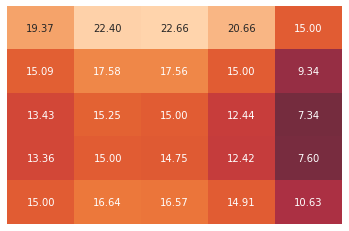

In [76]:
plotTemp(5, x)